In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
tp=pd.read_csv('New_titanic_train.csv')
tp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
tp.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
tp.shape

(891, 12)

In [5]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
tp.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
tp.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
tp['Age']=tp['Age'].replace(np.nan,tp['Age'].mean())

In [9]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
tp['Cabin']=imp.fit_transform(tp['Cabin'].values.reshape(-1,1))
tp['Embarked']=imp.fit_transform(tp['Embarked'].values.reshape(-1,1))

In [10]:
tp.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
tp.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
nominal_data=tp[['Name','Sex','Ticket','Cabin']].copy()

male      577
female    314
Name: Sex, dtype: int64


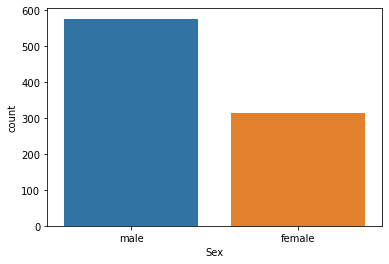

In [13]:
sns.countplot(x='Sex',data=nominal_data)
print(nominal_data['Sex'].value_counts())

<Figure size 1440x504 with 0 Axes>

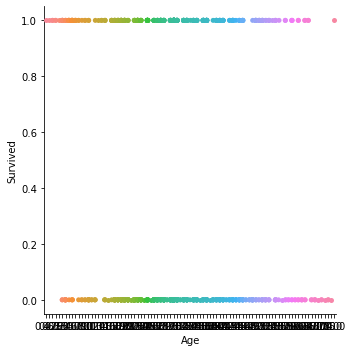

In [14]:
plt.figure(figsize=(20,7))
sns.catplot(x='Age',y='Survived',data=tp)

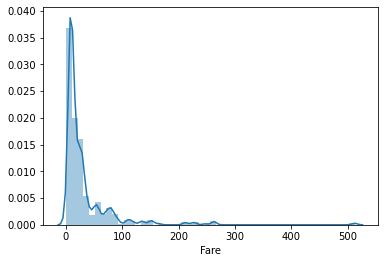

In [15]:
sns.distplot(tp['Fare'],kde=True)

In [16]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in tp.columns:
    if tp[i].dtype=="object":
        tp[i]=enc.fit_transform(tp[i].values.reshape(-1,1))

In [17]:
tp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108.0,1.0,22.0,1,0,523.0,7.2500,47.0,2.0
1,2,1,1,190.0,0.0,38.0,1,0,596.0,71.2833,81.0,0.0
2,3,1,3,353.0,0.0,26.0,0,0,669.0,7.9250,47.0,2.0
3,4,1,1,272.0,0.0,35.0,1,0,49.0,53.1000,55.0,2.0
4,5,0,3,15.0,1.0,35.0,0,0,472.0,8.0500,47.0,2.0


In [18]:
tp.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name           float64
Sex            float64
Age            float64
SibSp            int64
Parch            int64
Ticket         float64
Fare           float64
Cabin          float64
Embarked       float64
dtype: object

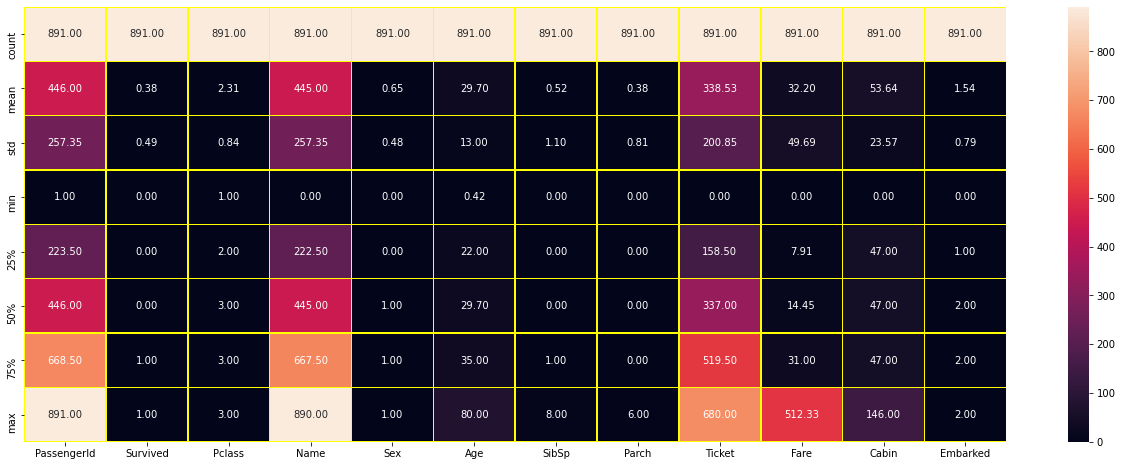

In [19]:
plt.figure(figsize=(22,8))
sns.heatmap(tp.describe(),annot=True,linewidths=0.5,linecolor='yellow',fmt='0.2f')

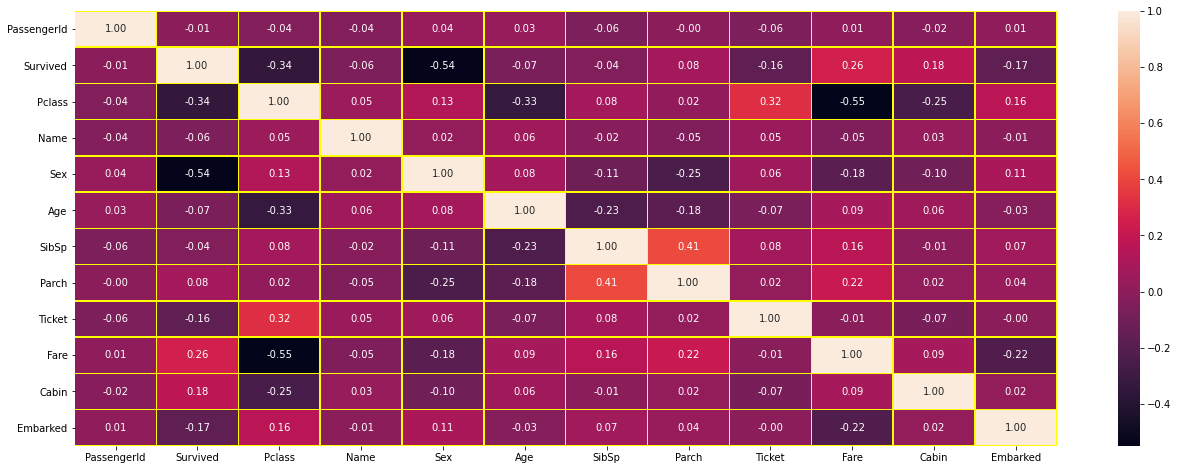

In [20]:
plt.figure(figsize=(22,8))
sns.heatmap(tp.corr(),annot=True,linewidths=0.5,linecolor='yellow',fmt='0.2f')

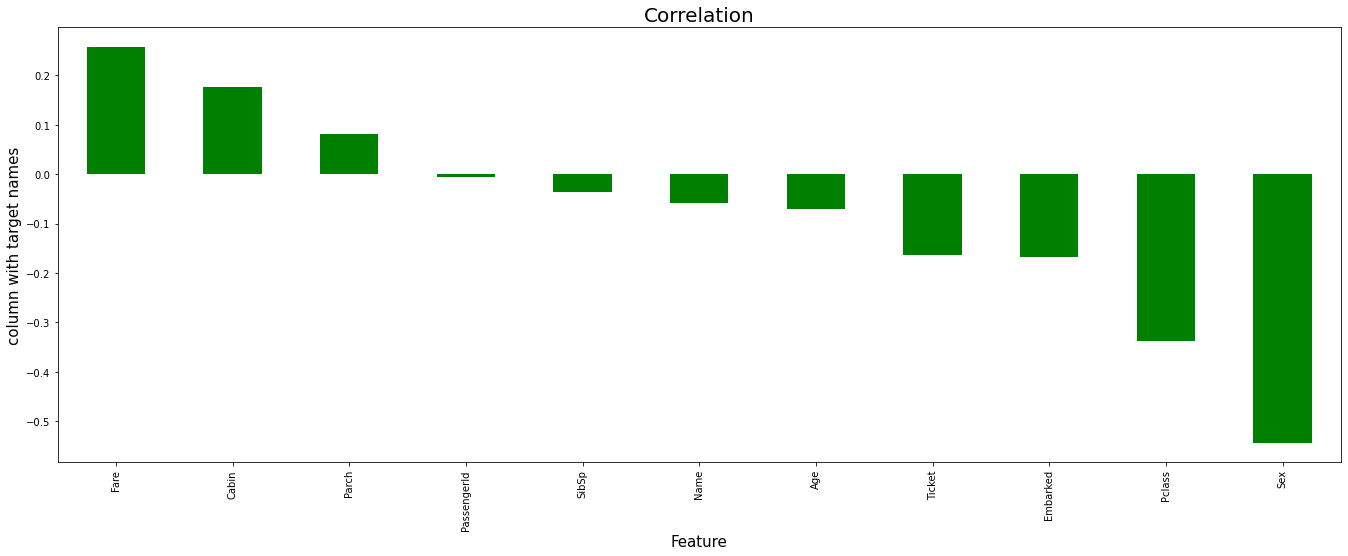

In [21]:
plt.figure(figsize=(23,8))
tp.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('column with target names',fontsize=15)
plt.title("Correlation",fontsize=20)
plt.show()

In [22]:
tp.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin          2.268926
Embarked      -1.264823
dtype: float64

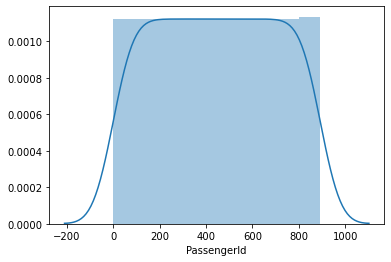

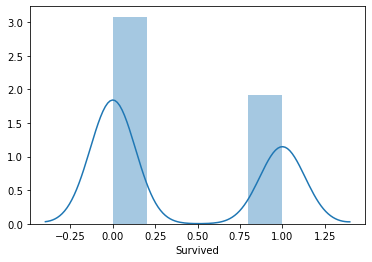

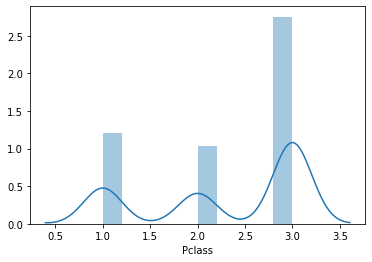

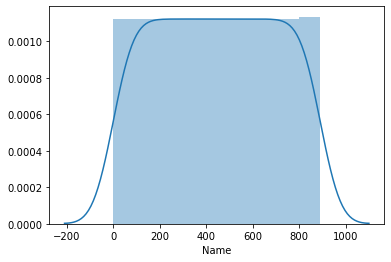

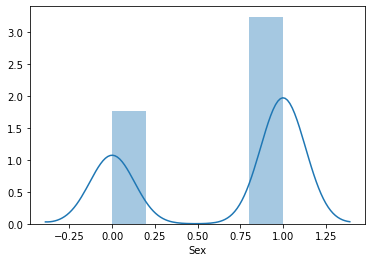

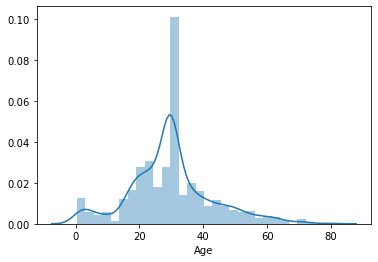

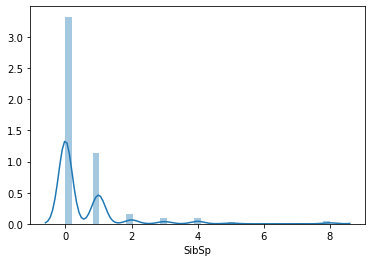

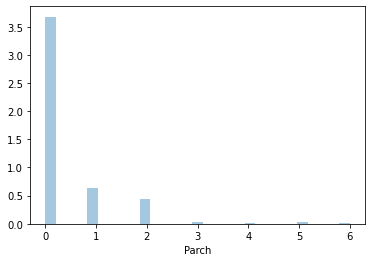

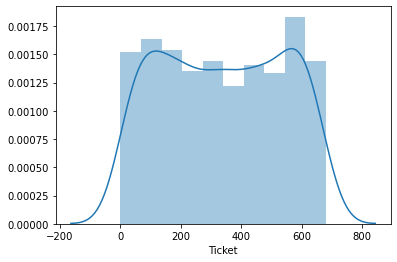

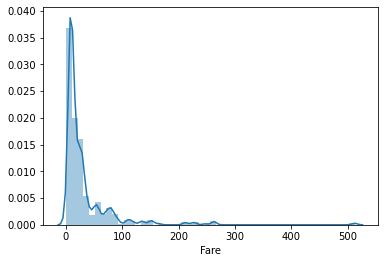

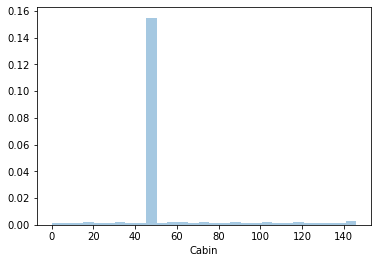

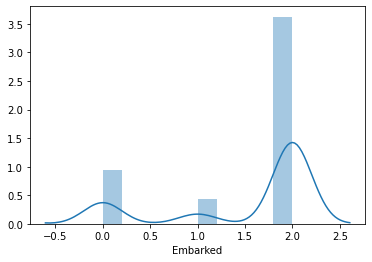

In [23]:
for i in tp.columns:
    plt.figure()
    sns.distplot(tp[i])

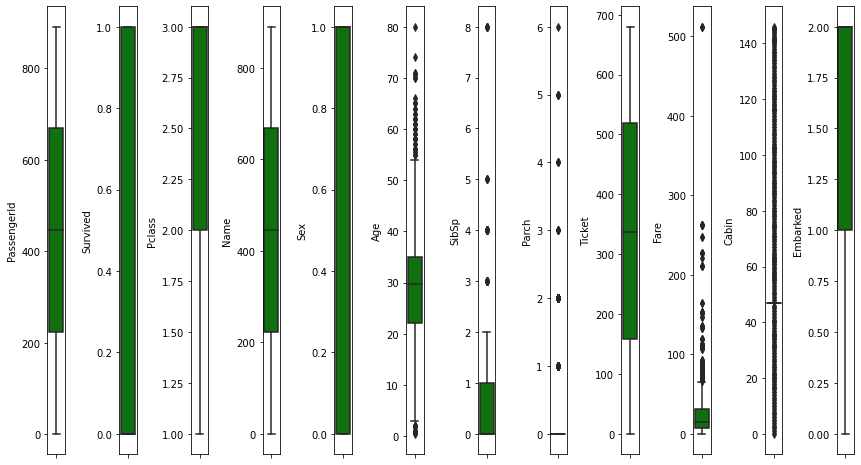

In [24]:
collist=tp.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(tp[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [25]:
tp2=tp.copy()

In [26]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(tp2))
z.shape

(891, 12)

In [27]:
threshold=3
print(np.where(z>3))

(array([  6,  10,  13,  16,  25,  27,  50,  59,  66,  68,  71,  75,  86,
        88,  96, 116, 118, 119, 128, 148, 159, 164, 167, 171, 180, 182,
       183, 193, 201, 205, 233, 251, 258, 261, 262, 266, 278, 299, 309,
       311, 324, 337, 339, 340, 341, 345, 360, 370, 377, 380, 386, 394,
       434, 437, 438, 438, 456, 462, 480, 493, 516, 527, 541, 542, 557,
       558, 567, 577, 585, 610, 618, 630, 638, 662, 672, 678, 679, 683,
       686, 689, 699, 700, 715, 716, 724, 730, 736, 737, 742, 745, 772,
       774, 776, 779, 787, 792, 809, 813, 824, 835, 846, 850, 851, 858,
       863, 885], dtype=int64), array([10, 10,  7,  6,  7,  9,  6,  6, 10,  6,  6, 10,  7,  9,  5,  5,  9,
        6, 10, 10,  6,  6,  7,  6,  6,  6, 10, 10,  6, 10,  6, 10,  9,  6,
       10,  6,  6,  9, 10,  9,  6, 10, 10, 10,  9, 10,  7, 10,  9,  9,  6,
       10, 10,  7,  7,  9, 10, 10,  6,  5, 10,  9,  6,  6,  9, 10,  7, 10,
       10,  7, 10,  5,  7, 10,  5,  7,  9,  6,  6,  9, 10,  9, 10,  9, 10,
        9,  7,  

In [28]:
tp1=tp2[(z<3).all(axis=1)]
print(tp2.shape)
print(tp1.shape)

(891, 12)
(786, 12)


In [29]:
loss=((891-786)/891)*100
loss

11.784511784511785

In [30]:
features=tp.drop(['Survived'],axis=1)
target=tp['Survived']

In [31]:
from sklearn.preprocessing import power_transform
features=power_transform(features,method='yeo-johnson')

In [32]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
features=mms.fit_transform(features)

In [33]:
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0
for k in range(1,200):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.20,random_state=k)
    lg=LogisticRegression()
    lg.fit(features_train,target_train)
    predlg=lg.predict(features_test)
    acc=accuracy_score(target_test,predlg)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.776536312849162 on Random_state  11
Best Accuracy is  0.7877094972067039 on Random_state  11
Best Accuracy is  0.7877094972067039 on Random_state  11
Best Accuracy is  0.8212290502793296 on Random_state  11
Best Accuracy is  0.8212290502793296 on Random_state  11
Best Accuracy is  0.8547486033519553 on Random_state  11
Best Accuracy is  0.8547486033519553 on Random_state  11
Best Accuracy is  0.8547486033519553 on Random_state  11
Best Accuracy is  0.8547486033519553 on Random_state  11
Best Accuracy is  0.8547486033519553 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.865921787709

Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.8659217877094972 on Random_state  11
Best Accuracy is  0.86592178770

In [34]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.20,random_state=k)

In [35]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(features_train,target_train)
predlg=lg.predict(features_test)
print(accuracy_score(target_test,predlg))
print(confusion_matrix(target_test,predlg))
print(classification_report(target_test,predlg))

0.776536312849162
[[91 14]
 [26 48]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       105
           1       0.77      0.65      0.71        74

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.78      0.78      0.77       179



In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(features_train,target_train)
preddt=dt.predict(features_test)
print(accuracy_score(target_test,preddt))
print(confusion_matrix(target_test,preddt))
print(classification_report(target_test,preddt))

0.7486033519553073
[[83 22]
 [23 51]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       105
           1       0.70      0.69      0.69        74

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



In [37]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(features_train,target_train)
predsvc=svc.predict(features_test)
print(accuracy_score(target_test,predsvc))
print(confusion_matrix(target_test,predsvc))
print(classification_report(target_test,predsvc))

0.7877094972067039
[[96  9]
 [29 45]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       105
           1       0.83      0.61      0.70        74

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.80      0.79      0.78       179



In [38]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()
ab.fit(features_train,target_train)
predab=ab.predict(features_test)
print(accuracy_score(target_test,predab))
print(confusion_matrix(target_test,predab))
print(classification_report(target_test,predab))

0.8044692737430168
[[94 11]
 [24 50]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [39]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(features_train,target_train)
predgn=gn.predict(features_test)
print(accuracy_score(target_test,predgn))
print(confusion_matrix(target_test,predgn))
print(classification_report(target_test,predgn))

0.7262569832402235
[[80 25]
 [24 50]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       105
           1       0.67      0.68      0.67        74

    accuracy                           0.73       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.73      0.73      0.73       179



In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(features_train,target_train)
predknn=knn.predict(features_test)
print(accuracy_score(target_test,predknn))
print(confusion_matrix(target_test,predknn))
print(classification_report(target_test,predknn))

0.8044692737430168
[[94 11]
 [24 50]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [41]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(lg,features,target,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.7980038917833155


In [42]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(dt,features,target,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.7521436193584835


In [43]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(svc,features,target,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.8103195028560668


In [44]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ab,features,target,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.7273994099554327


In [45]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(gn,features,target,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.7509195907350449


In [46]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(knn,features,target,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.7957253154227606


minimum difference is accuracy and cross validation score is for decisiontreeclassifier so this is our best model.

In [47]:
from sklearn.model_selection import GridSearchCV
params={'max_depth':np.arange(2,15),
       'criterion':['gini','entropy']}
gcv= GridSearchCV(DecisionTreeClassifier(),params,cv=5)
gcv.fit(features_train,target_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [48]:
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [49]:
gcv.best_score_

0.8090121146459174

In [50]:
gcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [51]:
gcv_pred=gcv.best_estimator_.predict(features_test)

In [52]:
accuracy_score(gcv_pred,target_test)

0.8100558659217877

In [53]:
import joblib
joblib.dump(dt,'titanicmodel.pkl')

['titanicmodel.pkl']